<a href="https://colab.research.google.com/github/ajou-y0uC4N/y0uC4N/blob/main/UAVCAN_type5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import time
#visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import graphviz
import seaborn as sns
from pandas.plotting import scatter_matrix

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MultiLabelBinarizer

# Oversampling
from imblearn.over_sampling import SMOTE

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# Models
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import reciprocal, uniform

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics.pairwise import rbf_kernel

# Keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow.keras.layers import Input, Dense, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Nadam

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/univ_pri/UAVCAN/type5.csv')

Mounted at /content/gdrive


In [3]:
data.head()

,type,time,isCan0,priority,messageID,isService,serviceNODEID,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],7byteNullCnt,8byteNullCnt
0,Normal,0.000000,1,5,1030,0,1,8,166,53,0,0,0,0,0,152,0,5
1,Normal,0.000126,1,5,1030,0,1,7,0,0,0,0,0,0,120,-1,6,0
2,Normal,0.005892,1,5,1030,0,1,8,166,53,0,0,0,0,0,153,0,5
3,Normal,0.006084,1,5,1030,0,1,7,0,0,0,0,0,0,121,-1,6,0
4,Normal,0.009503,1,5,1030,0,1,8,166,53,0,0,0,0,0,154,0,5


In [4]:
y = data['type']
X = data.drop(columns =['type'])
X = X.drop(columns =['isCan0'])
X = X.drop(columns = ['time'])
X = X.drop(columns=['priority'])
X = X.drop(columns=['serviceNODEID'])
X = X.drop(columns=['isService'])
X = X.drop(columns=['messageID'])
data.isnull().sum()
y.unique()
X.head()

,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],7byteNullCnt,8byteNullCnt
0,8,166,53,0,0,0,0,0,152,0,5
1,7,0,0,0,0,0,0,120,-1,6,0
2,8,166,53,0,0,0,0,0,153,0,5
3,7,0,0,0,0,0,0,121,-1,6,0
4,8,166,53,0,0,0,0,0,154,0,5


In [5]:
print(X.size)
print(y.size)

1986688
180608


In [6]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],7byteNullCnt,8byteNullCnt
byteSize,1.000000,0.237883,0.104333,0.248039,0.127660,0.409611,0.430842,0.246417,0.622029,-0.231554,0.227974
data[0],0.237883,1.000000,0.298677,0.033224,0.018190,0.063837,0.053454,0.064752,0.168575,-0.236487,0.138841
data[1],0.104333,0.298677,1.000000,-0.018071,0.205940,0.026473,0.013950,0.158830,-0.090283,-0.107885,-0.192956
data[2],0.248039,0.033224,-0.018071,1.000000,0.001135,0.595994,0.619348,0.056819,0.597004,-0.512205,-0.190402
data[3],0.127660,0.018190,0.205940,0.001135,1.000000,0.133967,0.184321,-0.124629,-0.224148,-0.091872,-0.335702
data[4],0.409611,0.063837,0.026473,0.595994,0.133967,1.000000,0.667178,0.075783,0.591518,-0.468785,-0.185757
data[5],0.430842,0.053454,0.013950,0.619348,0.184321,0.667178,1.000000,0.148714,0.614062,-0.494845,-0.194509
data[6],0.246417,0.064752,0.158830,0.056819,-0.124629,0.075783,0.148714,1.000000,0.030340,0.135428,-0.248998
data[7],0.622029,0.168575,-0.090283,0.597004,-0.224148,0.591518,0.614062,0.030340,1.000000,-0.718428,0.387320
7byteNullCnt,-0.231554,-0.236487,-0.107885,-0.512205,-0.091872,-0.468785,-0.494845,0.135428,-0.718428,1.000000,-0.263304


Text(0, 0.5, 'Number of Records')

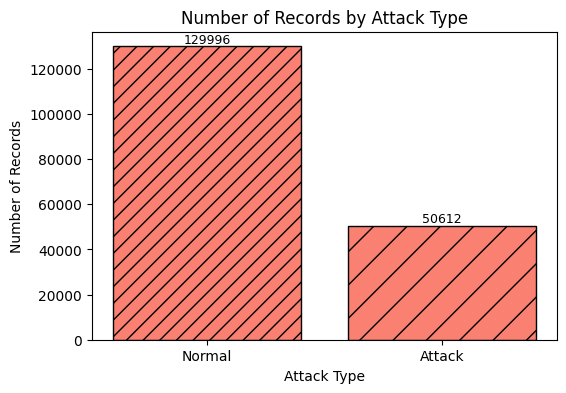

In [7]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 10

exam_x = y.value_counts().index.to_list()
exam_y = y.value_counts().to_list()

plt.bar(exam_x, exam_y)

bars = plt.bar(exam_x, exam_y, color='salmon', edgecolor='black')
bars[0].set_hatch('//')
bars[1].set_hatch('/')

for i, v in enumerate(exam_x):
    plt.text(v, exam_y[i], exam_y[i],
             fontsize=9,
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title("Number of Records by Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Number of Records")

In [8]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X.describe()

,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],7byteNullCnt,8byteNullCnt
count,180608.000000,180608.000000,180608.000000,180608.000000,180608.000000,180608.000000,180608.000000,180608.000000,180608.000000,180608.000000,180608.000000
mean,7.342349,117.090384,125.452228,53.963429,51.387646,49.993898,61.239043,99.079432,71.054366,1.081547,0.501262
std,1.059726,81.110454,81.598461,75.514838,47.855697,75.358690,88.702490,65.740144,71.887533,1.508938,1.364534
min,2.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,7.000000,46.000000,53.000000,0.000000,20.000000,1.000000,0.000000,35.000000,-1.000000,0.000000,0.000000
50%,8.000000,118.000000,129.000000,0.000000,54.000000,1.000000,0.000000,108.000000,49.000000,0.000000,0.000000
75%,8.000000,181.000000,219.000000,91.000000,64.000000,92.000000,165.000000,125.000000,143.000000,2.000000,0.000000
max,8.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,223.000000,6.000000,6.000000


In [10]:
X.head()

,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],7byteNullCnt,8byteNullCnt
0,8,166,53,0,0,0,0,0,152,0,5
1,7,0,0,0,0,0,0,120,-1,6,0
2,8,166,53,0,0,0,0,0,153,0,5
3,7,0,0,0,0,0,0,121,-1,6,0
4,8,166,53,0,0,0,0,0,154,0,5


In [11]:
y

0         Normal
1         Normal
2         Normal
3         Normal
4         Normal
           ...  
180603    Normal
180604    Normal
180605    Normal
180606    Normal
180607    Normal
Name: type, Length: 180608, dtype: object

In [12]:
X.shape
from sklearn.preprocessing import LabelEncoder

In [13]:
def predict(model, x, y):

    pred = model.predict(x)

    accuracy = accuracy_score(y, pred)
    print('Accuracy: %.3f%%\n\n' % accuracy )
    print(classification_report(y, pred, target_names=['Normal', 'attack'])+'\n')

    return pred

### ***Random forest***

In [15]:
y = y.map({'Normal': 0, 'Attack': 1})

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
#
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1) # gridserach 최적 파라미터
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 0.9459


In [18]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=20, min_samples_leaf=8, max_depth=8, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=20,
                       n_jobs=-1)

In [19]:
y_pred1 = rf.predict(X_test)

In [20]:
y_pred1

array([1, 0, 0, ..., 0, 0, 0])

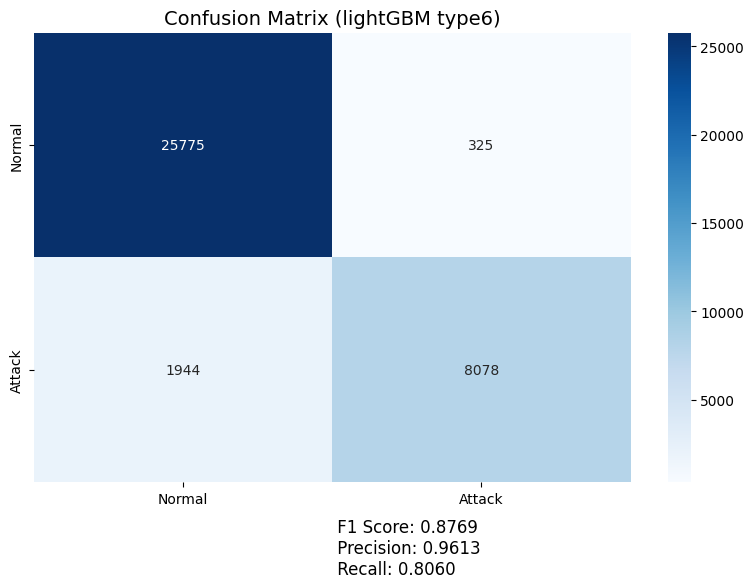

In [22]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# case1 model
cm1 = confusion_matrix(y_test, y_pred1, labels=[0, 1])
f1_1 = f1_score(y_test, y_pred1, pos_label=1)
precision_1 = precision_score(y_test, y_pred1, pos_label=1)
recall_1 = recall_score(y_test, y_pred1, pos_label=1)

# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# 첫 번째 subplot: baseline model
ax.set_title('Confusion Matrix (randomforest type5)', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

# Confusion Matrix에 F1 Score, Precision, Recall 값 추가
ax.text(0.5, -0.1, f'\n\n F1 Score: {f1_1:.4f}    \n Precision: {precision_1:.4f} \n Recall: {recall_1:.4f}',
        horizontalalignment='left', verticalalignment='center', transform=ax.transAxes,
        fontsize=12)

# Heatmap 그리기
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax, xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])

# subplot 간 간격 조절
plt.tight_layout()
plt.show()


### **SVM**

In [ ]:
start = time.time()

svm = OneVsRestClassifier(SVC(kernel="linear", gamma=1, C=5)) # 선형 커널. 나중에 c = 000.1로 수정.
svm.fit(X_train, y_train)

print("time :", time.time() - start)

In [ ]:
y_pred1 = rf.predict(X_test)

In [ ]:
#light GBM
#학습에 걸리는 시간이 XGBoost보다 적으면서 예측성능 차이가 크게 나지 않음
#적은 데이터셋(10,000건 이하)에 적용시 과적합이발생하기 쉽다는 단점이 있지만, 그보다 많은 데이터 셋을 활용하여 과적합을 예방하였다.
'''
Parameter value
learning_rate 0.01
max_depth 40
n_estimators 2843

import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)
'''


In [ ]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [ ]:
y = y.map({'normal': 0, 'attack': 1})

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# LightGBM 파라미터 설정
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 모델 학습
gbm = lgb.train(params,
                train_data,
                num_boost_round=100,
                valid_sets=[test_data])

# early_stopping_rounds=10
# 예측
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')